In [1]:
import pandas as pd

Abrir dataset con las noticias a trabajar

In [2]:
npr = pd.read_csv("C:\\Users\\fabia\\Desktop\\PLN\\NewsF.csv", sep=';')

In [3]:
npr.head()

,Unnamed: 0,Type,News
0,0,Business,Ad sales boost Time Warner profit\n\nQuarterly...
1,1,Business,Dollar gains on Greenspan speech\n\nThe dollar...
2,2,Business,Yukos unit buyer faces loan claim\n\nThe owner...
3,3,Business,High fuel prices hit BA's profits\n\nBritish A...
4,4,Business,Pernod takeover talk lifts Domecq\n\nShares in...


# No negativa Matriz factorizacion

In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [5]:
tfildf = TfidfVectorizer(max_df=0.95,min_df=2,stop_words='english')
#max_df: Elimina los terminos que se repiten en gran parte de los documentos y se indica la probabilidad de frecuencia de los terminos a eliminar
#min_df: Elimina los terminos que aparecen con muy poca frecuencia en los documentos y se indica la frecuenci minima con un numero de apariciones
#stop_words: Elimina las palabras innecesarias como los conectores, espacios, etc. Se indica el idioma.

In [6]:
#Crear matriz de valores con las noticias del dataset
dmt = tfildf.fit_transform(npr['News'])

In [7]:
#Matriz de articulos por el numero de palabras
dmt

<2225x17473 sparse matrix of type '<class 'numpy.float64'>'
	with 310493 stored elements in Compressed Sparse Row format>

Realizar Matriz de descomposicion

In [8]:
from sklearn.decomposition import NMF

In [9]:
nmf_model=NMF(n_components=5,random_state=42)
#n_components: Numero de temas en el documento
#random_state: Inicia la matriz con valores aleatorios

In [10]:
#Ajustar el modelo a la matriz creada
nmf_model.fit(dmt)

NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
  n_components=5, random_state=42, shuffle=False, solver='cd', tol=0.0001,
  verbose=0)

In [11]:
#Obtener una palabra
tfildf.get_feature_names()[2000]

'basingstoke'

In [12]:
#Obtener los temas correspondientes y las palabras relacionadas con cada tema
for index,topic in enumerate(nmf_model.components_):
    print(f'The top 15 words for topic # {index}')
    print([tfildf.get_feature_names()[i] for i in topic.argsort()[-15:]])
    print('\n')

The top 15 words for topic # 0
['video', 'tv', 'microsoft', 'phones', 'net', 'software', 'broadband', 'users', 'phone', 'technology', 'digital', 'said', 'music', 'people', 'mobile']


The top 15 words for topic # 1
['tories', 'tory', 'tax', 'prime', 'chancellor', 'minister', 'howard', 'government', 'said', 'party', 'brown', 'election', 'blair', 'labour', 'mr']


The top 15 words for topic # 2
['coach', 'injury', 'france', 'match', 'rugby', 'players', 'play', 'team', 'said', 'cup', 'ireland', 'wales', 'win', 'game', 'england']


The top 15 words for topic # 3
['year', 'star', 'comedy', 'aviator', 'director', 'films', 'won', 'festival', 'actress', 'oscar', 'actor', 'award', 'awards', 'best', 'film']


The top 15 words for topic # 4
['rates', 'dollar', 'rate', 'china', 'market', '2004', 'prices', 'oil', 'economic', 'sales', 'year', 'bank', 'said', 'economy', 'growth']




Adjuntar las etiquetas de los textos de descubrimiento para que aparezcan en los articulos originales

In [13]:
#Almacenar los resultados de la transformacion matricial en una variable
topic_results = nmf_model.transform(dmt)

In [14]:
#Resultados
topic_results

array([[0.02872331, 0.        , 0.        , 0.01950167, 0.11132663],
       [0.        , 0.00862298, 0.00396475, 0.00102976, 0.14713907],
       [0.        , 0.00438948, 0.        , 0.        , 0.09375638],
       ...,
       [0.06501645, 0.02313799, 0.00988036, 0.        , 0.01954545],
       [0.048924  , 0.0277534 , 0.        , 0.        , 0.00919157],
       [0.07781879, 0.0055701 , 0.11342189, 0.00437516, 0.        ]])

In [17]:
#Almacenar datos de matriz en un csv
df = pd.DataFrame(topic_results,index=topic_results[:,0])

In [18]:
df.head()

,0,1,2,3,4
0.028723,0.028723,0.000000,0.000000,0.019502,0.111327
0.000000,0.000000,0.008623,0.003965,0.001030,0.147139
0.000000,0.000000,0.004389,0.000000,0.000000,0.093756
0.002487,0.002487,0.000000,0.006778,0.000248,0.108001
0.006576,0.006576,0.000000,0.009873,0.001518,0.062782


In [19]:
df.to_csv(r'C:\\Users\\fabia\\Desktop\\PLN\\News222.csv',sep=';')

In [22]:
#Numero de tema correspondiente al primer elemento de la matriz
topic_results[0].argmax()

4

In [24]:
#Tranzfomar la matriz de resultados a un arreglo con los temas de cada elemento
topic_results.argmax(axis=1)

array([4, 4, 4, ..., 0, 0, 2], dtype=int64)

In [27]:
#Almacenar resultados en nueva columna del dataset
npr['Topic_MATRIX'] = topic_results.argmax(axis=1)

In [28]:
npr.head()

,Unnamed: 0,Type,News,Topic_MATRIX
0,0,Business,Ad sales boost Time Warner profit\n\nQuarterly...,4
1,1,Business,Dollar gains on Greenspan speech\n\nThe dollar...,4
2,2,Business,Yukos unit buyer faces loan claim\n\nThe owner...,4
3,3,Business,High fuel prices hit BA's profits\n\nBritish A...,4
4,4,Business,Pernod takeover talk lifts Domecq\n\nShares in...,4


In [32]:
#Asignarle un nombre a cadatemas en el dataset
mytopic_dict = {0:'Tech',1:'Economy',2:'Sport',3:'Entertainment',4:'Business'}
npr['Topic Label'] = npr['Topic_MATRIX'].map(mytopic_dict)

In [33]:
npr.head()

,Unnamed: 0,Type,News,Topic_MATRIX,Topic Label
0,0,Business,Ad sales boost Time Warner profit\n\nQuarterly...,4,Business
1,1,Business,Dollar gains on Greenspan speech\n\nThe dollar...,4,Business
2,2,Business,Yukos unit buyer faces loan claim\n\nThe owner...,4,Business
3,3,Business,High fuel prices hit BA's profits\n\nBritish A...,4,Business
4,4,Business,Pernod takeover talk lifts Domecq\n\nShares in...,4,Business


# MINI SOM

# SOM



# SOM 2

In [36]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
from sompy.sompy import SOMFactory
from sklearn.datasets import fetch_california_housing

In [37]:
data = fetch_california_housing()
descr = data.DESCR
names = fetch_california_housing().feature_names+["HouseValue"]

data = np.column_stack([data.data, data.target])
print(descr)
print( "FEATURES: ", ", ".join(names))

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

In [38]:
data

array([[   8.3252    ,   41.        ,    6.98412698, ...,   37.88      ,
        -122.23      ,    4.526     ],
       [   8.3014    ,   21.        ,    6.23813708, ...,   37.86      ,
        -122.22      ,    3.585     ],
       [   7.2574    ,   52.        ,    8.28813559, ...,   37.85      ,
        -122.24      ,    3.521     ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,   39.43      ,
        -121.22      ,    0.923     ],
       [   1.8672    ,   18.        ,    5.32951289, ...,   39.43      ,
        -121.32      ,    0.847     ],
       [   2.3886    ,   16.        ,    5.25471698, ...,   39.37      ,
        -121.24      ,    0.894     ]])

In [40]:
topic_results

array([[0.02872331, 0.        , 0.        , 0.01950167, 0.11132663],
       [0.        , 0.00862298, 0.00396475, 0.00102976, 0.14713907],
       [0.        , 0.00438948, 0.        , 0.        , 0.09375638],
       ...,
       [0.06501645, 0.02313799, 0.00988036, 0.        , 0.01954545],
       [0.048924  , 0.0277534 , 0.        , 0.        , 0.00919157],
       [0.07781879, 0.0055701 , 0.11342189, 0.00437516, 0.        ]])

In [41]:
topic_results.shape

(2225, 5)

# Visualizacion

In [42]:
name=['Tech','Economy','Sport','Entertainment','Business']

In [43]:
name

['Tech', 'Economy', 'Sport', 'Entertainment', 'Business']

In [45]:
#msz = calculate_msz(data)
sm = SOMFactory().build(topic_results, normalization = 'var', initialization='random', component_names=name)
sm.train(n_job=1, verbose=False, train_rough_len=2, train_finetune_len=5)

In [46]:
topographic_error = sm.calculate_topographic_error()
quantization_error = np.mean(sm._bmu[1])
print ("Topographic error = %s; Quantization error = %s" % (topographic_error, quantization_error))

Topographic error = 0.7644943820224719; Quantization error = 0.3339545654310883


Components mmap

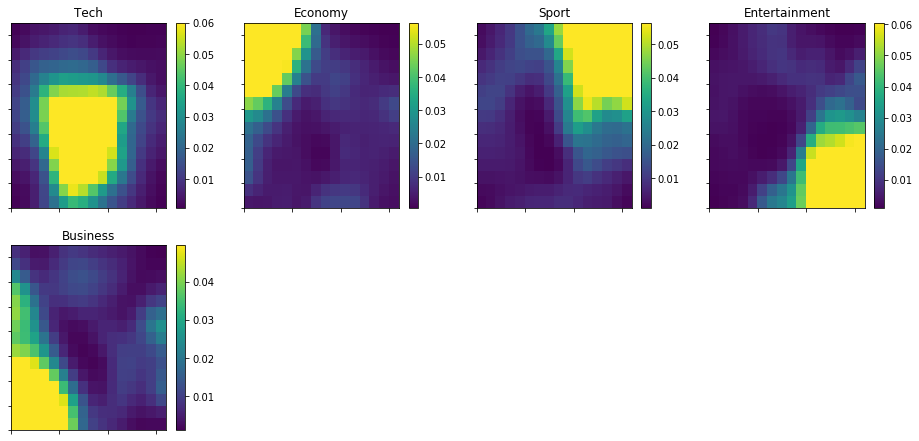

In [47]:
from sompy.visualization.mapview import View2D
view2D  = View2D(10,10,"rand data",text_size=10)
view2D.show(sm, col_sz=4, which_dim="all", denormalize=True)

Hist map

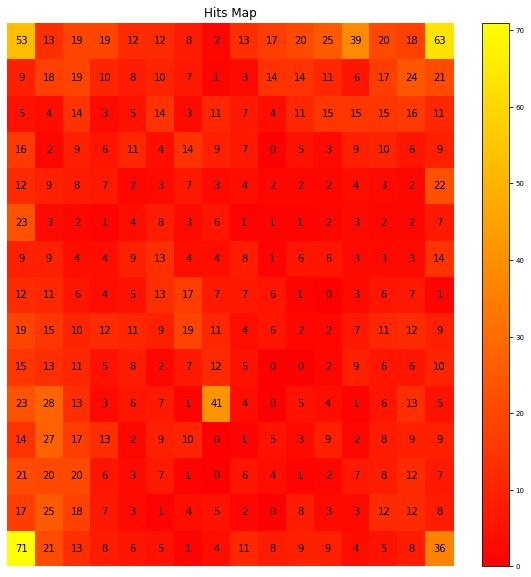

In [48]:
from sompy.visualization.bmuhits import BmuHitsView

vhts  = BmuHitsView(10,10,"Hits Map",text_size=7)
vhts.show(sm, anotate=True, onlyzeros=False, labelsize=10, cmap="autumn", logaritmic=False)
plt.show()
#cmap="Greys"

K-Means clustering

C:\ProgramData\Anaconda3\lib\site-packages\sompy\visualization\hitmap.py:37: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = self._fig.add_subplot(111)


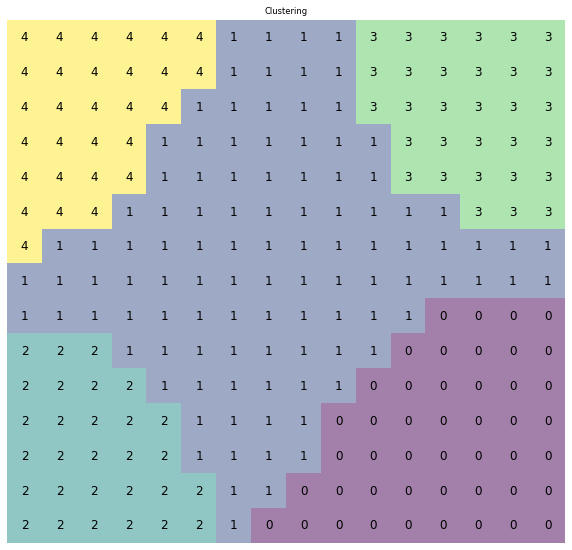

In [49]:
from sompy.visualization.hitmap import HitMapView
sm.cluster(5)
hits  = HitMapView(10,10,"Clustering",text_size=7)
a=hits.show(sm, labelsize=12)